In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import time

In [5]:
plt.rcParams.update({'font.size': 22})

In [6]:
file_path = "../Data_acquisition/Final DB/household/"

In [7]:
df = pd.read_csv(file_path + "merged_energy.csv")
df.head()

,day,energy_sum,Count,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [8]:
series = np.array(df.avg_energy.values)


In [9]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [10]:
def windowed_dataset1(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [11]:
def plot_series(time, series, format="-", start = 0, end= None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

In [12]:
time_series = np.arange(len(series))

In [13]:
#train test split 70-30
split_time = int(len(series)*0.7)
time_train = time_series[:split_time]
x_train = series[:split_time]
time_valid = time_series[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 10
shuffle_buffer_size = 300

In [14]:
#DNN: try with hyperparameters
start = time.time()

dataset = windowed_dataset1(x_train,window_size,batch_size,shuffle_buffer_size)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(15, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10 **(epoch/20)
)

optimizer = tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)
model.compile(loss = "mae", optimizer=optimizer)
history = model.fit(dataset,epochs = 100, callbacks=[lr_schedule],verbose=1)

print(time.time()-start)

Epoch 1/100
55/55 [==============================] - 0s 2ms/step - loss: 5.5223
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 5.5033
Epoch 3/100
55/55 [==============================] - 0s 1ms/step - loss: 5.4815
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 5.4571
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 5.4297
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 5.3989
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 5.3645
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 5.3257
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 5.2824
Epoch 10/100
55/55 [==============================] - 0s 1ms/step - loss: 5.2340
Epoch 11/100
55/55 [==============================] - 0s 2ms/step - loss: 5.1799
Epoch 12/100
55/55 [==============================] - 0s 2ms/step - loss: 5.1193
Epoch 13/100
55/55 [=================

In [ ]:
# choose the best learning rate

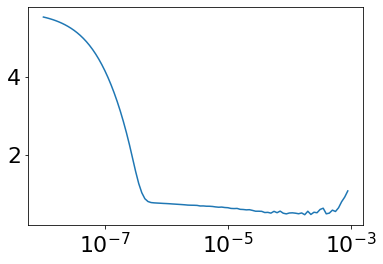

In [16]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])

In [17]:
start = time.time()

dataset = windowed_dataset1(x_train,window_size,batch_size,shuffle_buffer_size)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(15, activation="relu"), 
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=3e-5,momentum=0.9)
model.compile(loss = "mae", optimizer=optimizer)
history = model.fit(dataset,epochs = 500,verbose=1)
print(time.time()-start)

=========================] - 0s 2ms/step - loss: 0.3796
Epoch 258/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 259/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3566
Epoch 260/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 261/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3707
Epoch 262/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3525
Epoch 263/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3537
Epoch 264/500
55/55 [==============================] - 0s 1ms/step - loss: 0.3656
Epoch 265/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3709
Epoch 266/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3626
Epoch 267/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 268/500
55/55 [==============================] - 0s 2ms/step - loss: 0.3490
Epoch 269/500
55/55 [=====================

In [ ]:
# good sign of convergence :)

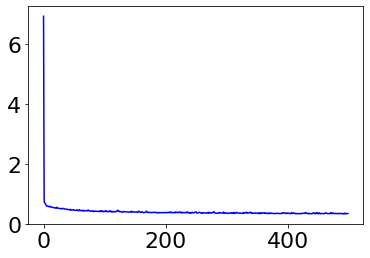

In [18]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.plot(epochs, loss, "b", label="Training Loss")
plt.show()

In [19]:
start = time.time()
forecast = []

for t in range(len(series)-window_size):
  forecast.append(model.predict(series[t:t+window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:,0,0]

print(time.time()-start)

29.590256214141846


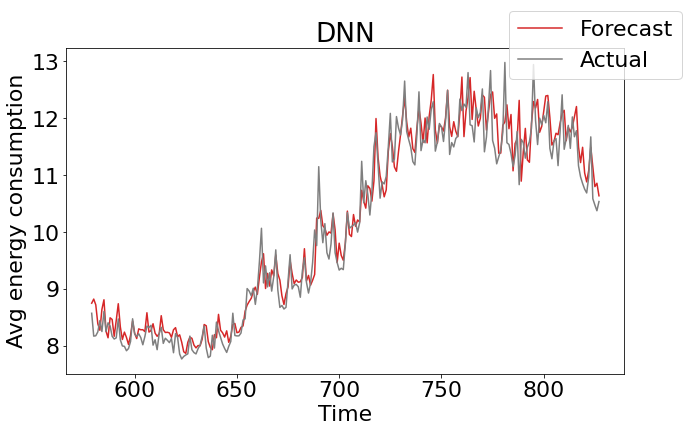

In [21]:
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, results, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, x_valid, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("DNN")
ax1.set_ylabel("Avg energy consumption")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

In [17]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

0.26486093

In [22]:
mean_absolute_percentage_error(x_valid,results)

2.4619463281976266